# Loading dataset

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)
#print(iris.keys())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [41]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Visualization

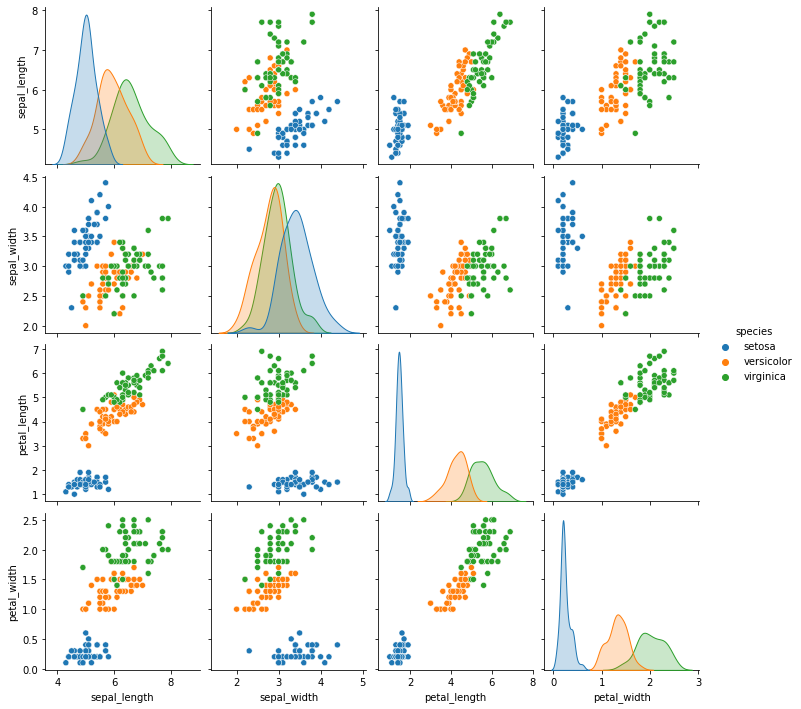

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

sns.pairplot(df, hue='species')
plt.show()

Partitioning data

In [43]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Classifying using Decision Tree Learning

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

Show tree

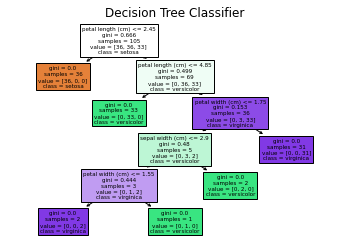

In [45]:
plot_tree(
    model_dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True
)
plt.title('Decision Tree Classifier')
plt.show()

Evaluation DT model

In [46]:
from sklearn import metrics

prediction = model_dt.predict(X_test)
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = prediction)
print(accuracy)

0.8888888888888888


In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test, y_pred = prediction)

array([[14,  0,  0],
       [ 0, 13,  1],
       [ 0,  4, 13]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


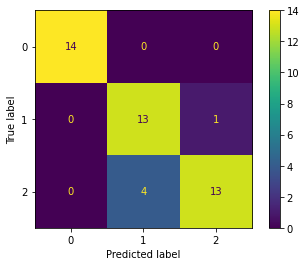

In [48]:
from sklearn.metrics import plot_confusion_matrix
 
plot_confusion_matrix(model_dt, X_test, y_test)  
plt.show()

Confusion matrix, without normalization
[[14  0  0]
 [ 0 13  1]
 [ 0  4 13]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92857143 0.07142857]
 [0.         0.23529412 0.76470588]]


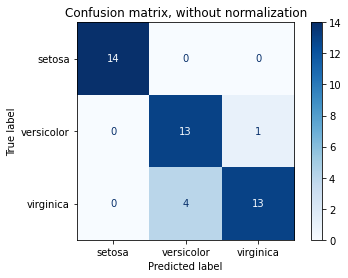

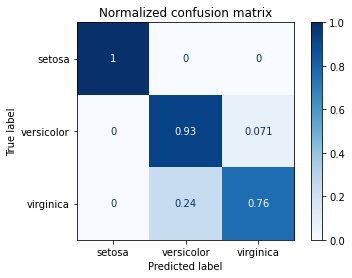

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [
    ("Confusion matrix DT model, without normalization", None),
    ("Normalized confusion matrix DT model", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_dt,
        X_test,
        y_test,
        display_labels= iris.target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Classifying using Instance-based Learning

In [50]:
from sklearn import neighbors

n_neighbors = 15
model_knn = neighbors.KNeighborsClassifier(n_neighbors)
model_knn.fit(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

Evaluation kNN model

In [51]:
from sklearn import metrics

prediction = model_knn.predict(X_test)
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = prediction)
print(accuracy)

0.9555555555555556


Confusion matrix kNN model, without normalization
[[14  0  0]
 [ 0 13  1]
 [ 0  1 16]]
Normalized confusion matrix kNN model
[[1.         0.         0.        ]
 [0.         0.92857143 0.07142857]
 [0.         0.05882353 0.94117647]]


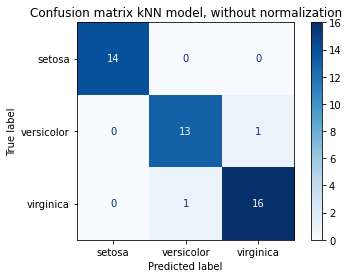

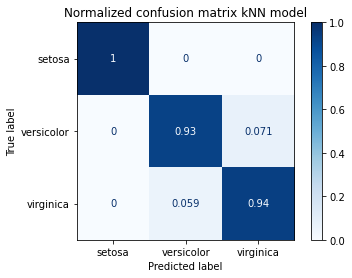

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [
    ("Confusion matrix kNN model, without normalization", None),
    ("Normalized confusion matrix kNN model", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_knn,
        X_test,
        y_test,
        display_labels= iris.target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Classification Bayesian Learning

In [53]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Evaluation GNB model

In [54]:
from sklearn import metrics

prediction = model_gnb.predict(X_test)
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = prediction)
print(accuracy)

0.9333333333333333


Confusion matrix GNB model, without normalization
[[14  0  0]
 [ 0 13  1]
 [ 0  2 15]]
Normalized confusion matrix GNB model
[[1.         0.         0.        ]
 [0.         0.92857143 0.07142857]
 [0.         0.11764706 0.88235294]]


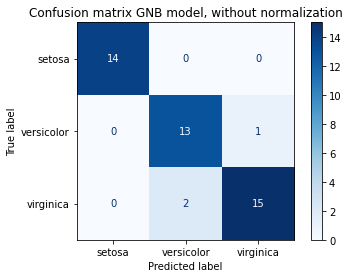

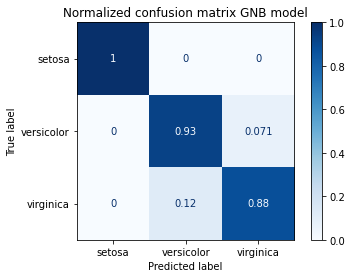

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [
    ("Confusion matrix GNB model, without normalization", None),
    ("Normalized confusion matrix GNB model", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_gnb,
        X_test,
        y_test,
        display_labels= iris.target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Classification Support Vector Machines

Just complete :)